In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv(r"C:\Users\vamsi\Downloads\data-final-clean.csv")
df.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   1.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   1.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   2.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   1.0   

   OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  country  
0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0       GB  
1   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0       MY  
2   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0       GB  
3   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0       GB  
4   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0       KE  

[5 rows x 51 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874366 entries, 0 to 874365
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   EXT1     874366 non-null  float64
 1   EXT2     874366 non-null  float64
 2   EXT3     874366 non-null  float64
 3   EXT4     874366 non-null  float64
 4   EXT5     874366 non-null  float64
 5   EXT6     874366 non-null  float64
 6   EXT7     874366 non-null  float64
 7   EXT8     874366 non-null  float64
 8   EXT9     874366 non-null  float64
 9   EXT10    874366 non-null  float64
 10  EST1     874366 non-null  float64
 11  EST2     874366 non-null  float64
 12  EST3     874366 non-null  float64
 13  EST4     874366 non-null  float64
 14  EST5     874366 non-null  float64
 15  EST6     874366 non-null  float64
 16  EST7     874366 non-null  float64
 17  EST8     874366 non-null  float64
 18  EST9     874366 non-null  float64
 19  EST10    874366 non-null  float64
 20  AGR1     874366 non-null  

In [5]:
data=df.drop(columns=['country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874366 entries, 0 to 874365
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    874366 non-null  float64
 1   EXT2    874366 non-null  float64
 2   EXT3    874366 non-null  float64
 3   EXT4    874366 non-null  float64
 4   EXT5    874366 non-null  float64
 5   EXT6    874366 non-null  float64
 6   EXT7    874366 non-null  float64
 7   EXT8    874366 non-null  float64
 8   EXT9    874366 non-null  float64
 9   EXT10   874366 non-null  float64
 10  EST1    874366 non-null  float64
 11  EST2    874366 non-null  float64
 12  EST3    874366 non-null  float64
 13  EST4    874366 non-null  float64
 14  EST5    874366 non-null  float64
 15  EST6    874366 non-null  float64
 16  EST7    874366 non-null  float64
 17  EST8    874366 non-null  float64
 18  EST9    874366 non-null  float64
 19  EST10   874366 non-null  float64
 20  AGR1    874366 non-null  float64
 21  AGR2    87

In [6]:
data.describe().T

count      mean       std  min  25%  50%  75%  max
EXT1   874366.0  2.645722  1.250873  1.0  2.0  3.0  4.0  5.0
EXT2   874366.0  2.795878  1.306719  1.0  2.0  3.0  4.0  5.0
EXT3   874366.0  3.298991  1.188253  1.0  2.0  3.0  4.0  5.0
EXT4   874366.0  3.167780  1.210437  1.0  2.0  3.0  4.0  5.0
EXT5   874366.0  3.297526  1.239671  1.0  2.0  3.0  4.0  5.0
EXT6   874366.0  2.411209  1.208842  1.0  1.0  2.0  3.0  5.0
EXT7   874366.0  2.780486  1.380443  1.0  2.0  3.0  4.0  5.0
EXT8   874366.0  3.443966  1.242380  1.0  2.0  4.0  4.0  5.0
EXT9   874366.0  2.979552  1.325272  1.0  2.0  3.0  4.0  5.0
EXT10  874366.0  3.588271  1.274354  1.0  3.0  4.0  5.0  5.0
EST1   874366.0  3.310365  1.318010  1.0  2.0  3.0  4.0  5.0
EST2   874366.0  3.197194  1.191388  1.0  2.0  3.0  4.0  5.0
EST3   874366.0  3.867571  1.129275  1.0  3.0  4.0  5.0  5.0
EST4   874366.0  2.689092  1.227435  1.0  2.0  3.0  4.0  5.0
EST5   874366.0  2.852700  1.254421  1.0  2.0  3.0  4.0  5.0
EST6   874366.0  2.866237  1.296898  1.0  2.0  3.0  4.0  5.0
EST7   874366.0  3.063024  1.270452  1.0  2.0  3.0  4.0  5.0
EST8   874366.0  2.694089  1.324291  1.0  2.0  3.0  4.0  5.0
EST9   874366.0  3.103289  1.274183  1.0  2.0  3.0  4.0  5.0
EST10  874366.0  2.795145  1.305115  1.0  2.0  3.0  4.0  5.0
AGR1   874366.0  2.247912  1.321236  1.0  1.0  2.0  3.0  5.0
AGR2   874366.0  3.867908  1.080131  1.0  3.0  4.0  5.0  5.0
AGR3   874366.0  2.270176  1.266203  1.0  1.0  2.0  3.0  5.0
AGR4   874366.0  3.956937  1.075861  1.0  3.0  4.0  5.0  5.0
AGR5   874366.0  2.285025  1.155356  1.0  1.0  2.0  3.0  5.0
AGR6   874366.0  3.778313  1.165010  1.0  3.0  4.0  5.0  5.0
AGR7   874366.0  2.209331  1.105137  1.0  1.0  2.0  3.0  5.0
AGR8   874366.0  3.719953  1.041949  1.0  3.0  4.0  4.0  5.0
AGR9   874366.0  3.808003  1.131322  1.0  3.0  4.0  5.0  5.0
AGR10  874366.0  3.617444  1.030940  1.0  3.0  4.0  4.0  5.0
CSN1   874366.0  3.341474  1.122325  1.0  3.0  3.0  4.0  5.0
CSN2   874366.0  2.949742  1.372535  1.0  2.0  3.0  4.0  5.0
CSN3   874366.0  4.004442  0.995164  1.0  3.0  4.0  5.0  5.0
CSN4   874366.0  2.630893  1.232569  1.0  2.0  2.0  4.0  5.0
CSN5   874366.0  2.634133  1.254199  1.0  2.0  2.0  4.0  5.0
CSN6   874366.0  2.841238  1.399420  1.0  2.0  3.0  4.0  5.0
CSN7   874366.0  3.733081  1.079110  1.0  3.0  4.0  5.0  5.0
CSN8   874366.0  2.480866  1.120525  1.0  2.0  2.0  3.0  5.0
CSN9   874366.0  3.222879  1.248200  1.0  2.0  3.0  4.0  5.0
CSN10  874366.0  3.627419  0.998013  1.0  3.0  4.0  4.0  5.0
OPN1   874366.0  3.703012  1.100085  1.0  3.0  4.0  5.0  5.0
OPN2   874366.0  2.070539  1.095057  1.0  1.0  2.0  3.0  5.0
OPN3   874366.0  4.035000  1.040030  1.0  3.0  4.0  5.0  5.0
OPN4   874366.0  1.995500  1.071263  1.0  1.0  2.0  3.0  5.0
OPN5   874366.0  3.824292  0.933457  1.0  3.0  4.0  5.0  5.0
OPN6   874366.0  1.901216  1.084801  1.0  1.0  2.0  2.0  5.0
OPN7   874366.0  4.022253  0.935575  1.0  4.0  4.0  5.0  5.0
OPN8   874366.0  3.221338  1.222729  1.0  2.0  3.0  4.0  5.0
OPN9   874366.0  4.166729  0.971584  1.0  4.0  4.0  5.0  5.0
OPN10  874366.0  3.983932  0.986200  1.0  3.0  4.0  5.0  5.0

In [7]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  874366


## Understanding the data

In [8]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [9]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,80))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


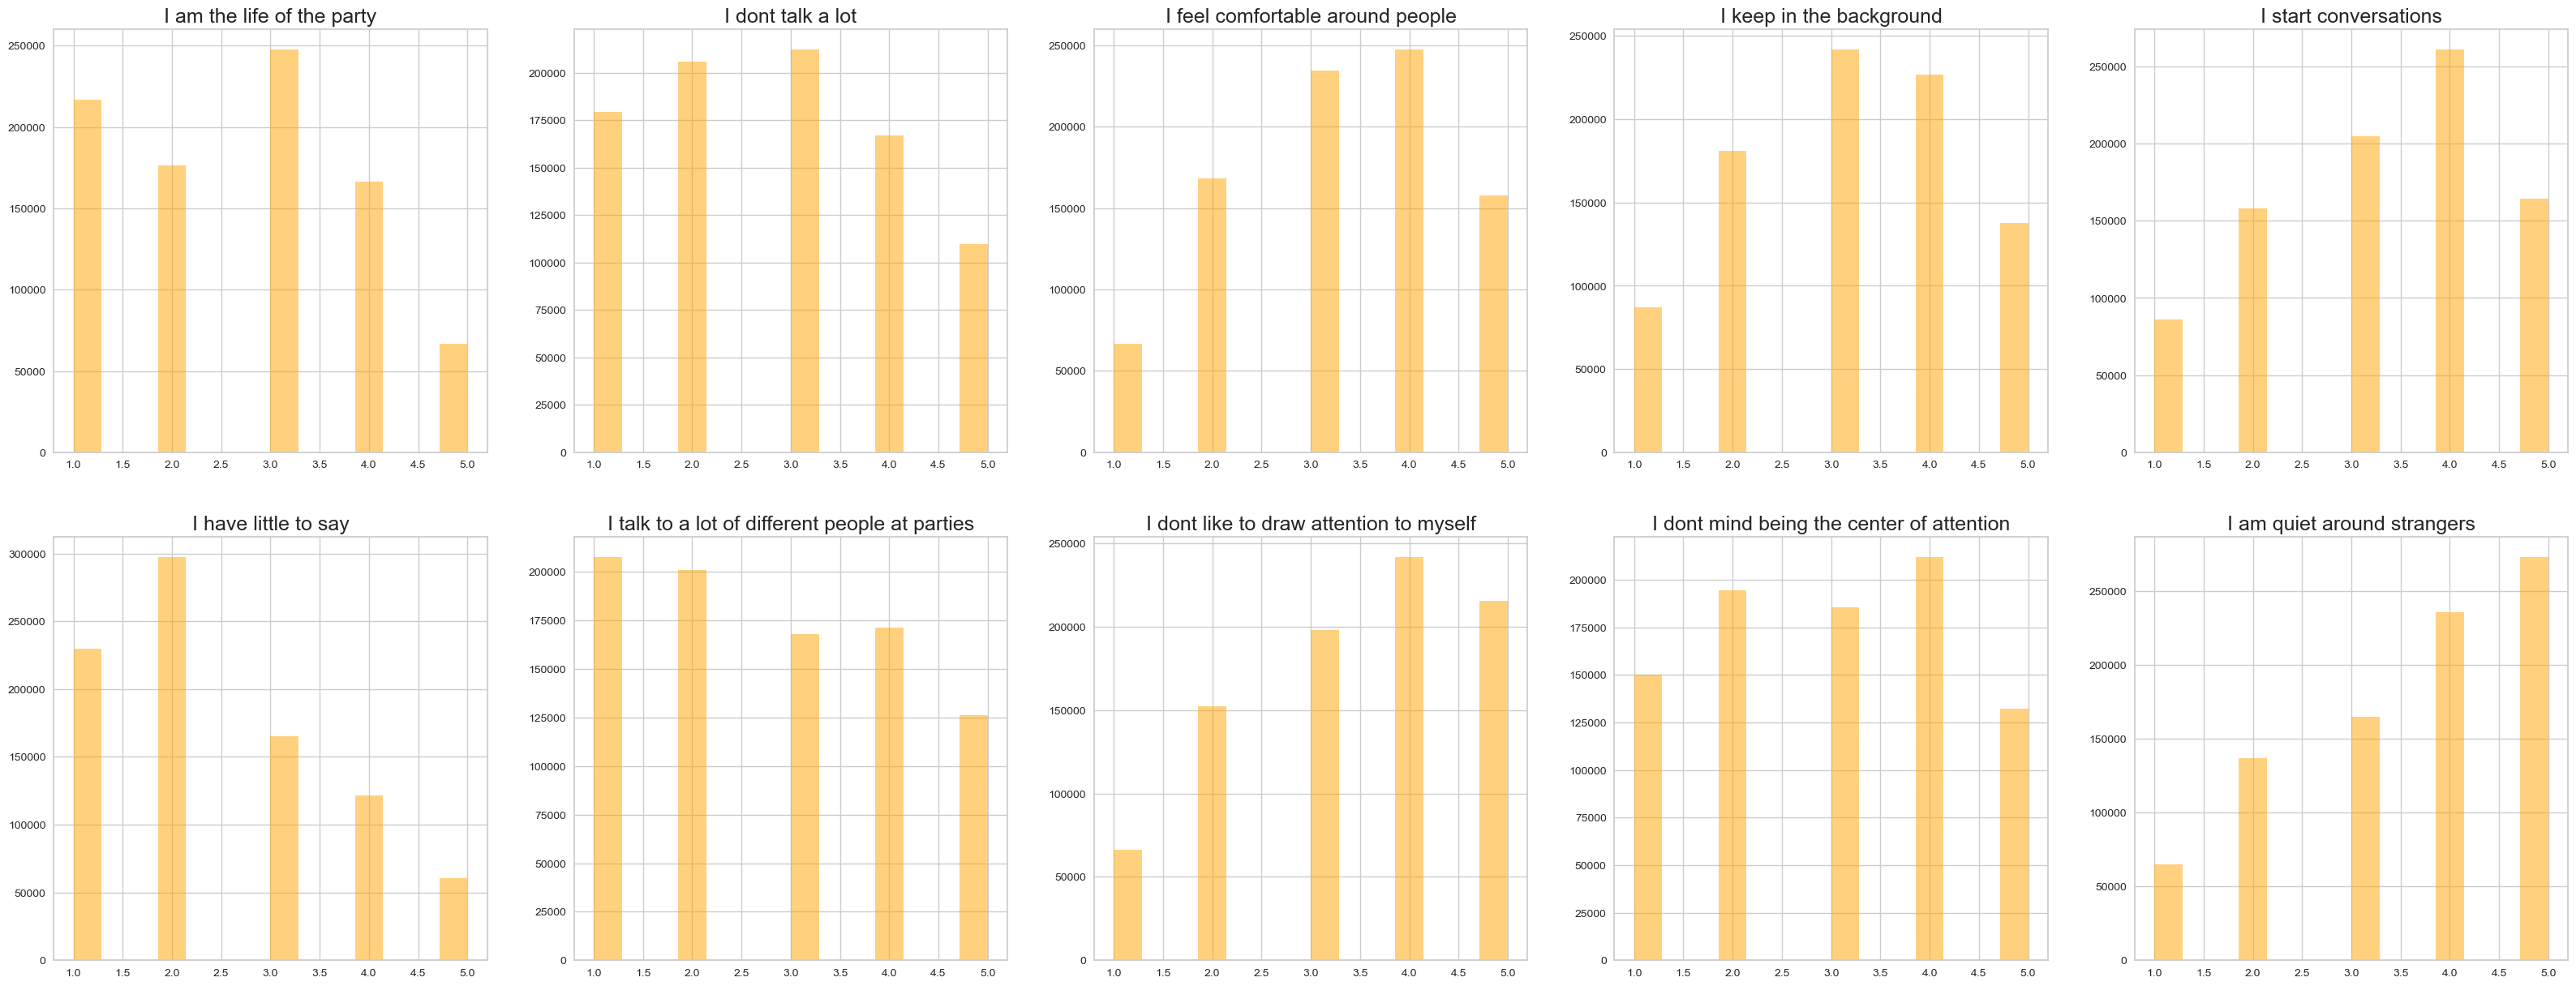

In [10]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


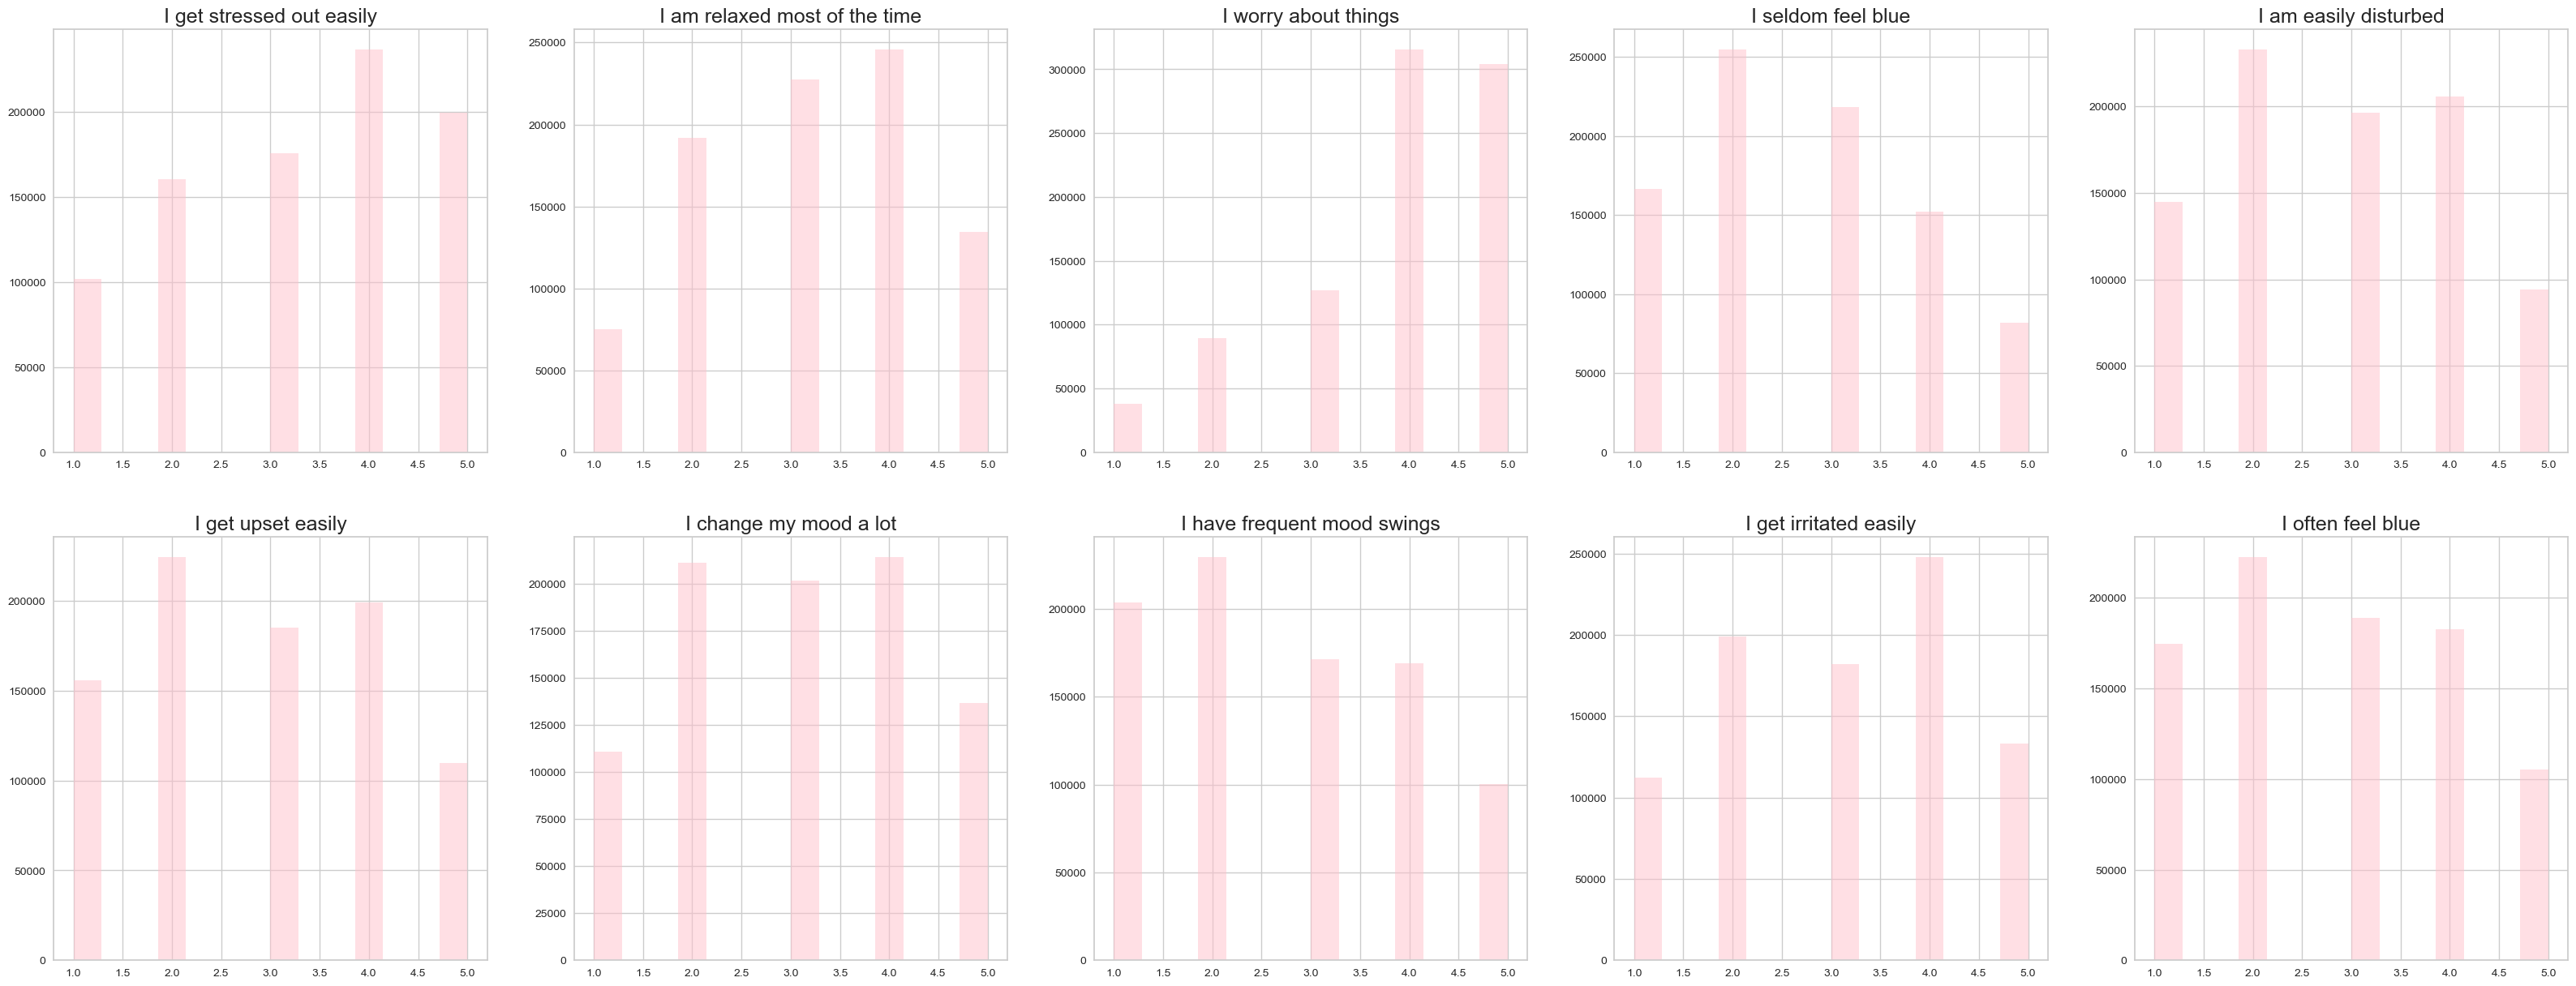

In [11]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


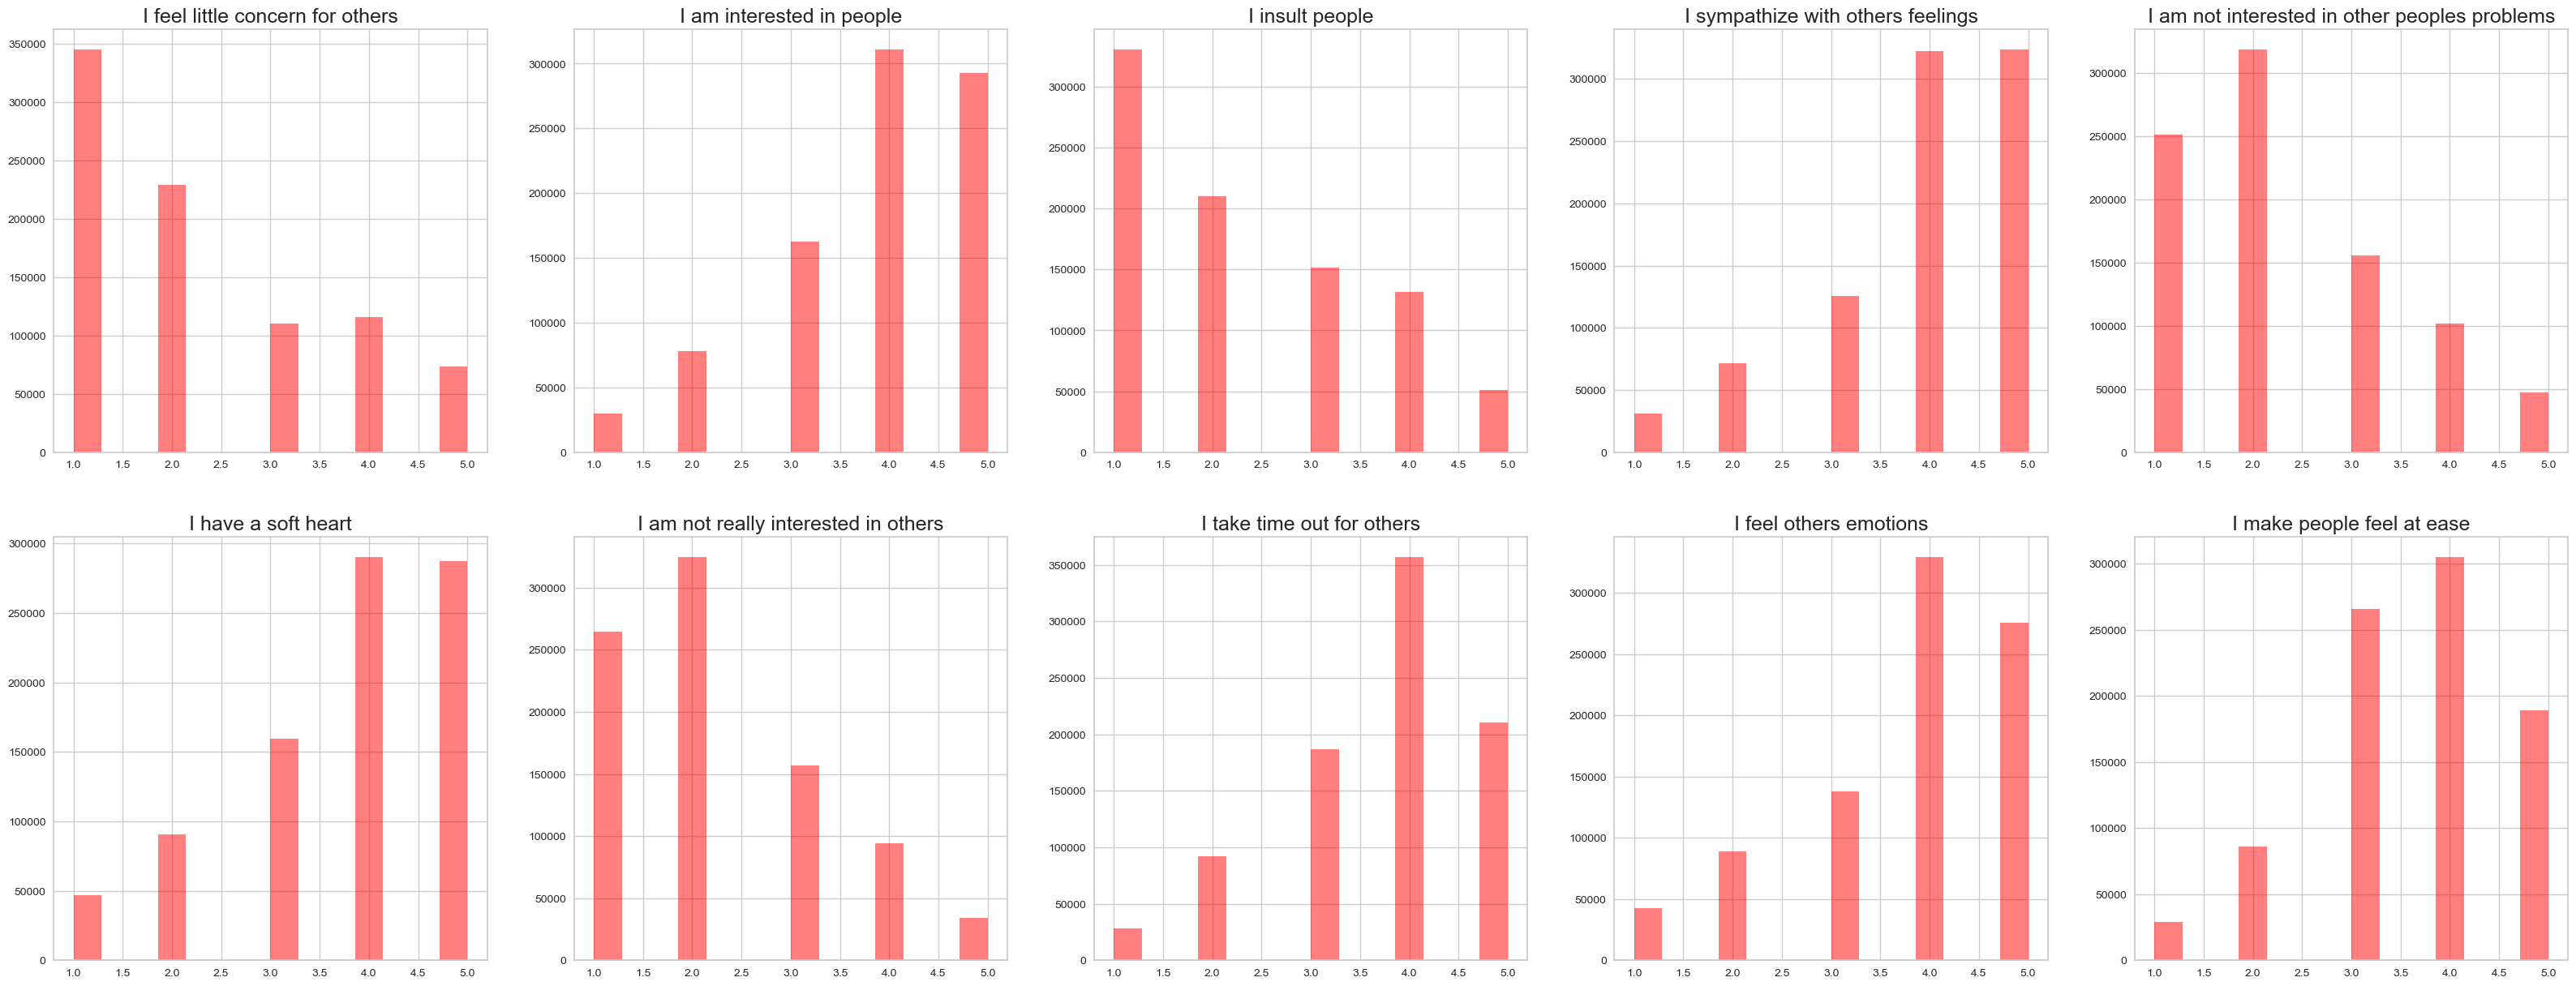

In [12]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


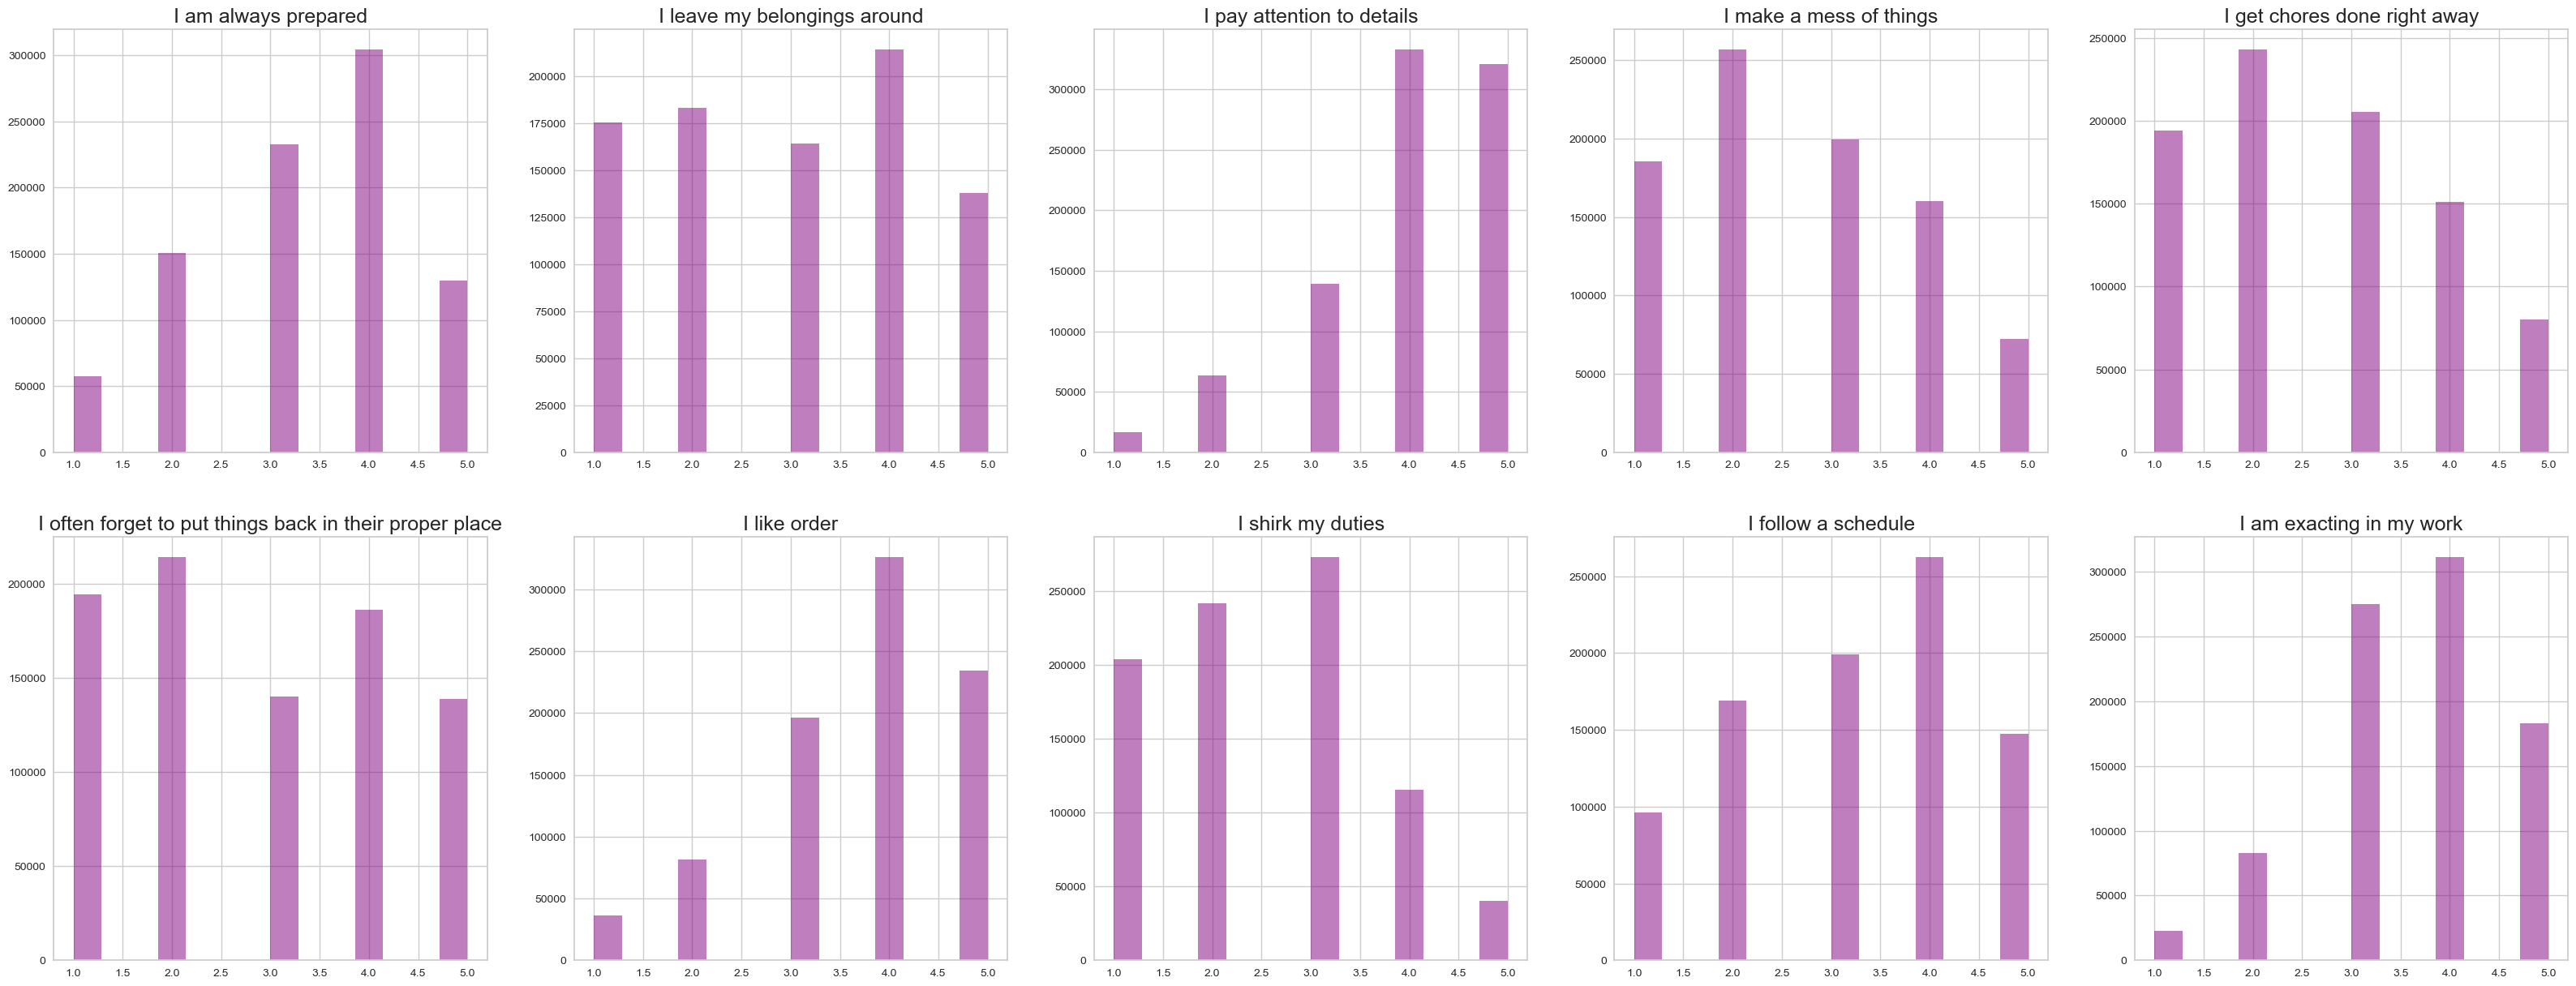

In [13]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


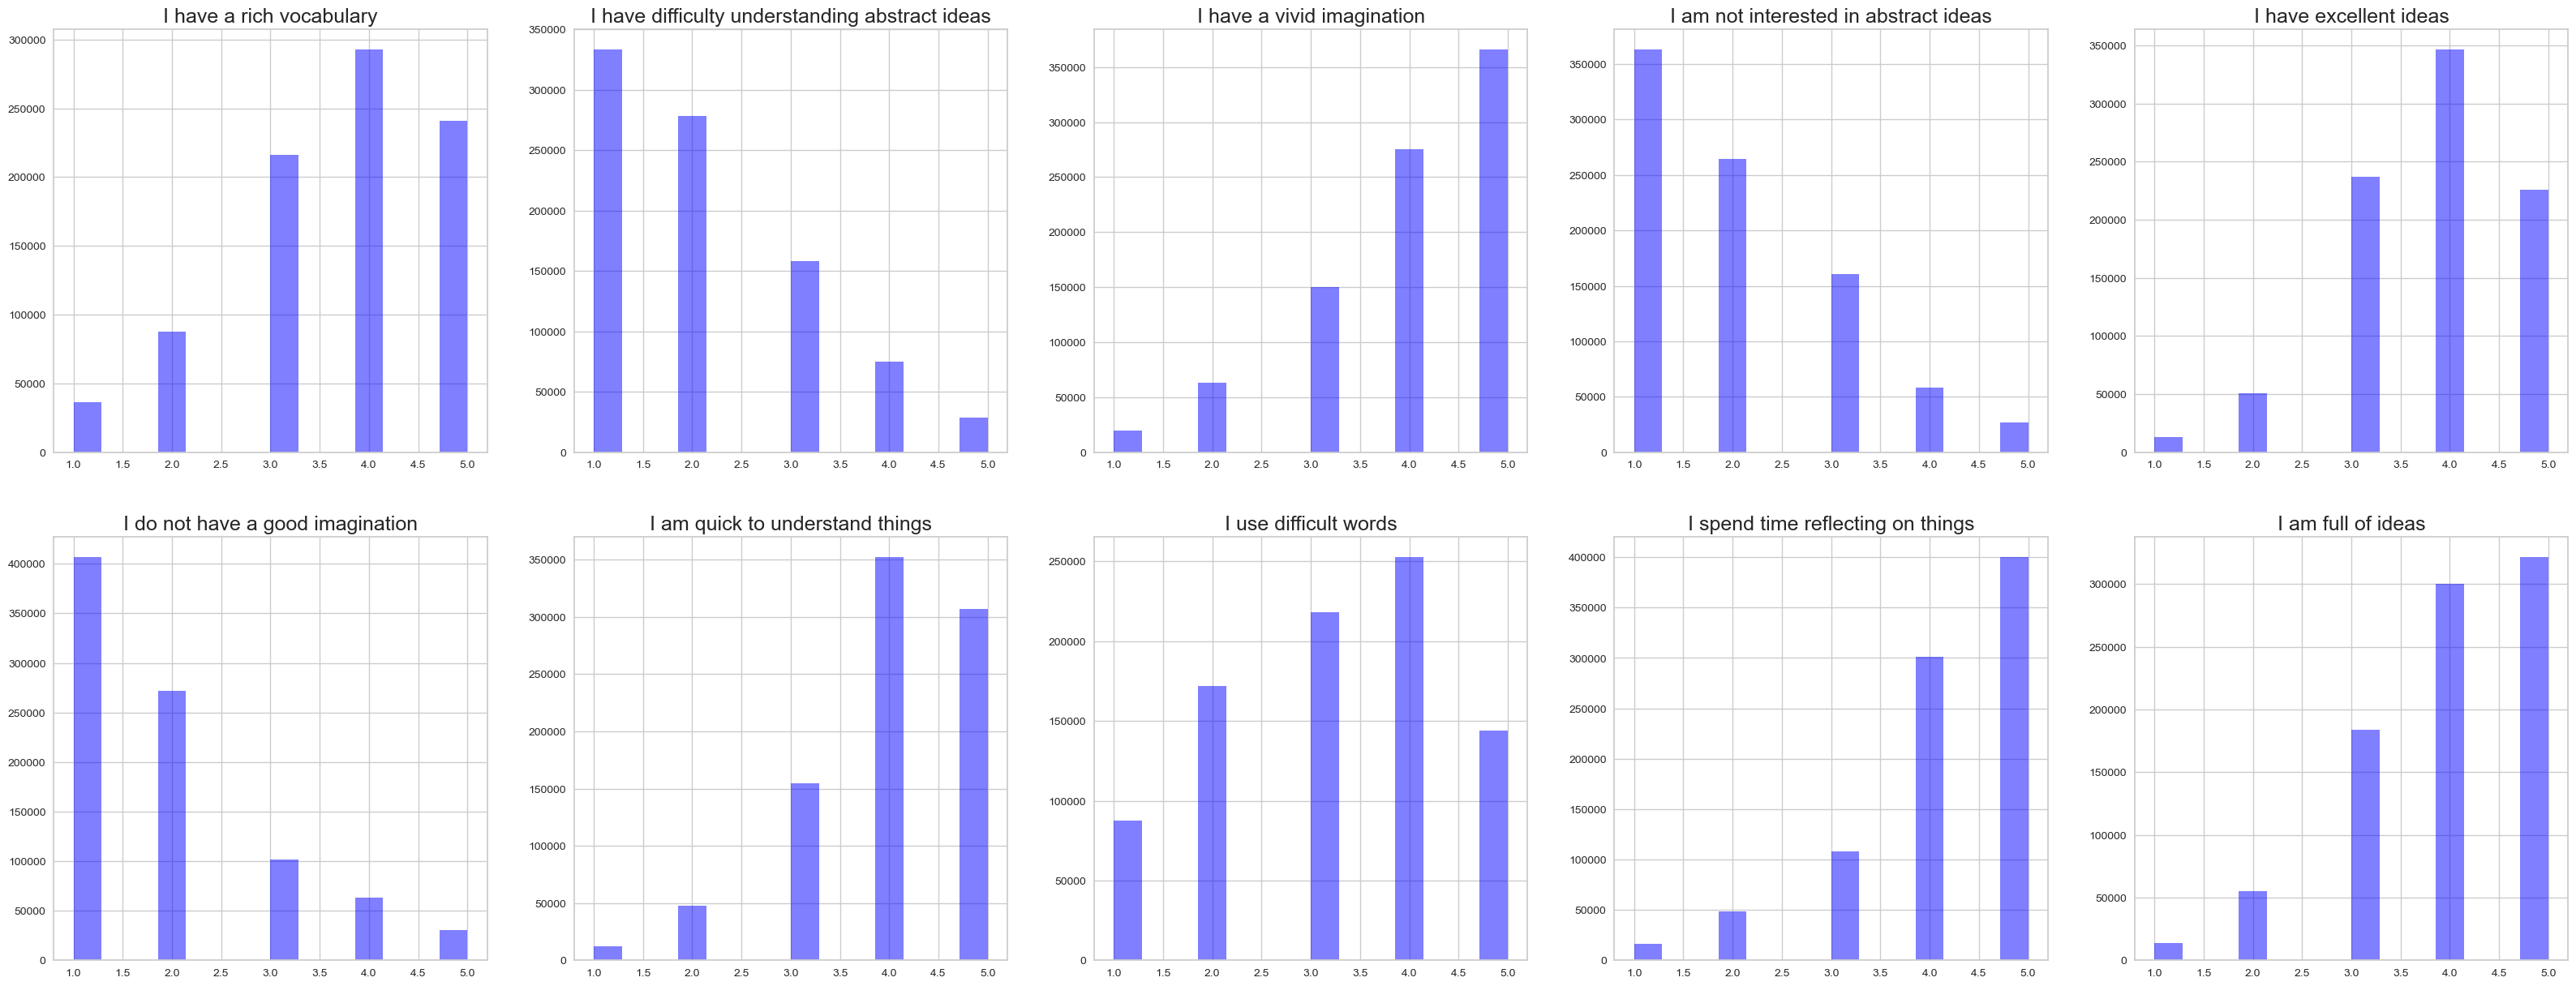

In [14]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

## Scaling the data

In [15]:
new_row =[5,4,2,4,3,5,1,3,5,2,4,1,5,2,3,1,5,3,5,2,2,4,2,4,1,4,3,4,5,2,4,3,1,4,5,1,3,2,4,1,2,2,3,1,3,4,2,5,2,3]
my_data =pd.DataFrame(columns = list(data.columns))
my_data.loc[0] = new_row
my_data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0     5     4     2     4     3     5     1     3     5      2  ...     2   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0     2     3     1     3     4     2     5     2      3  

[1 rows x 50 columns]

In [16]:
corr=pd.read_csv(r"C:\Users\vamsi\Downloads\polychor.csv",index_col=0)

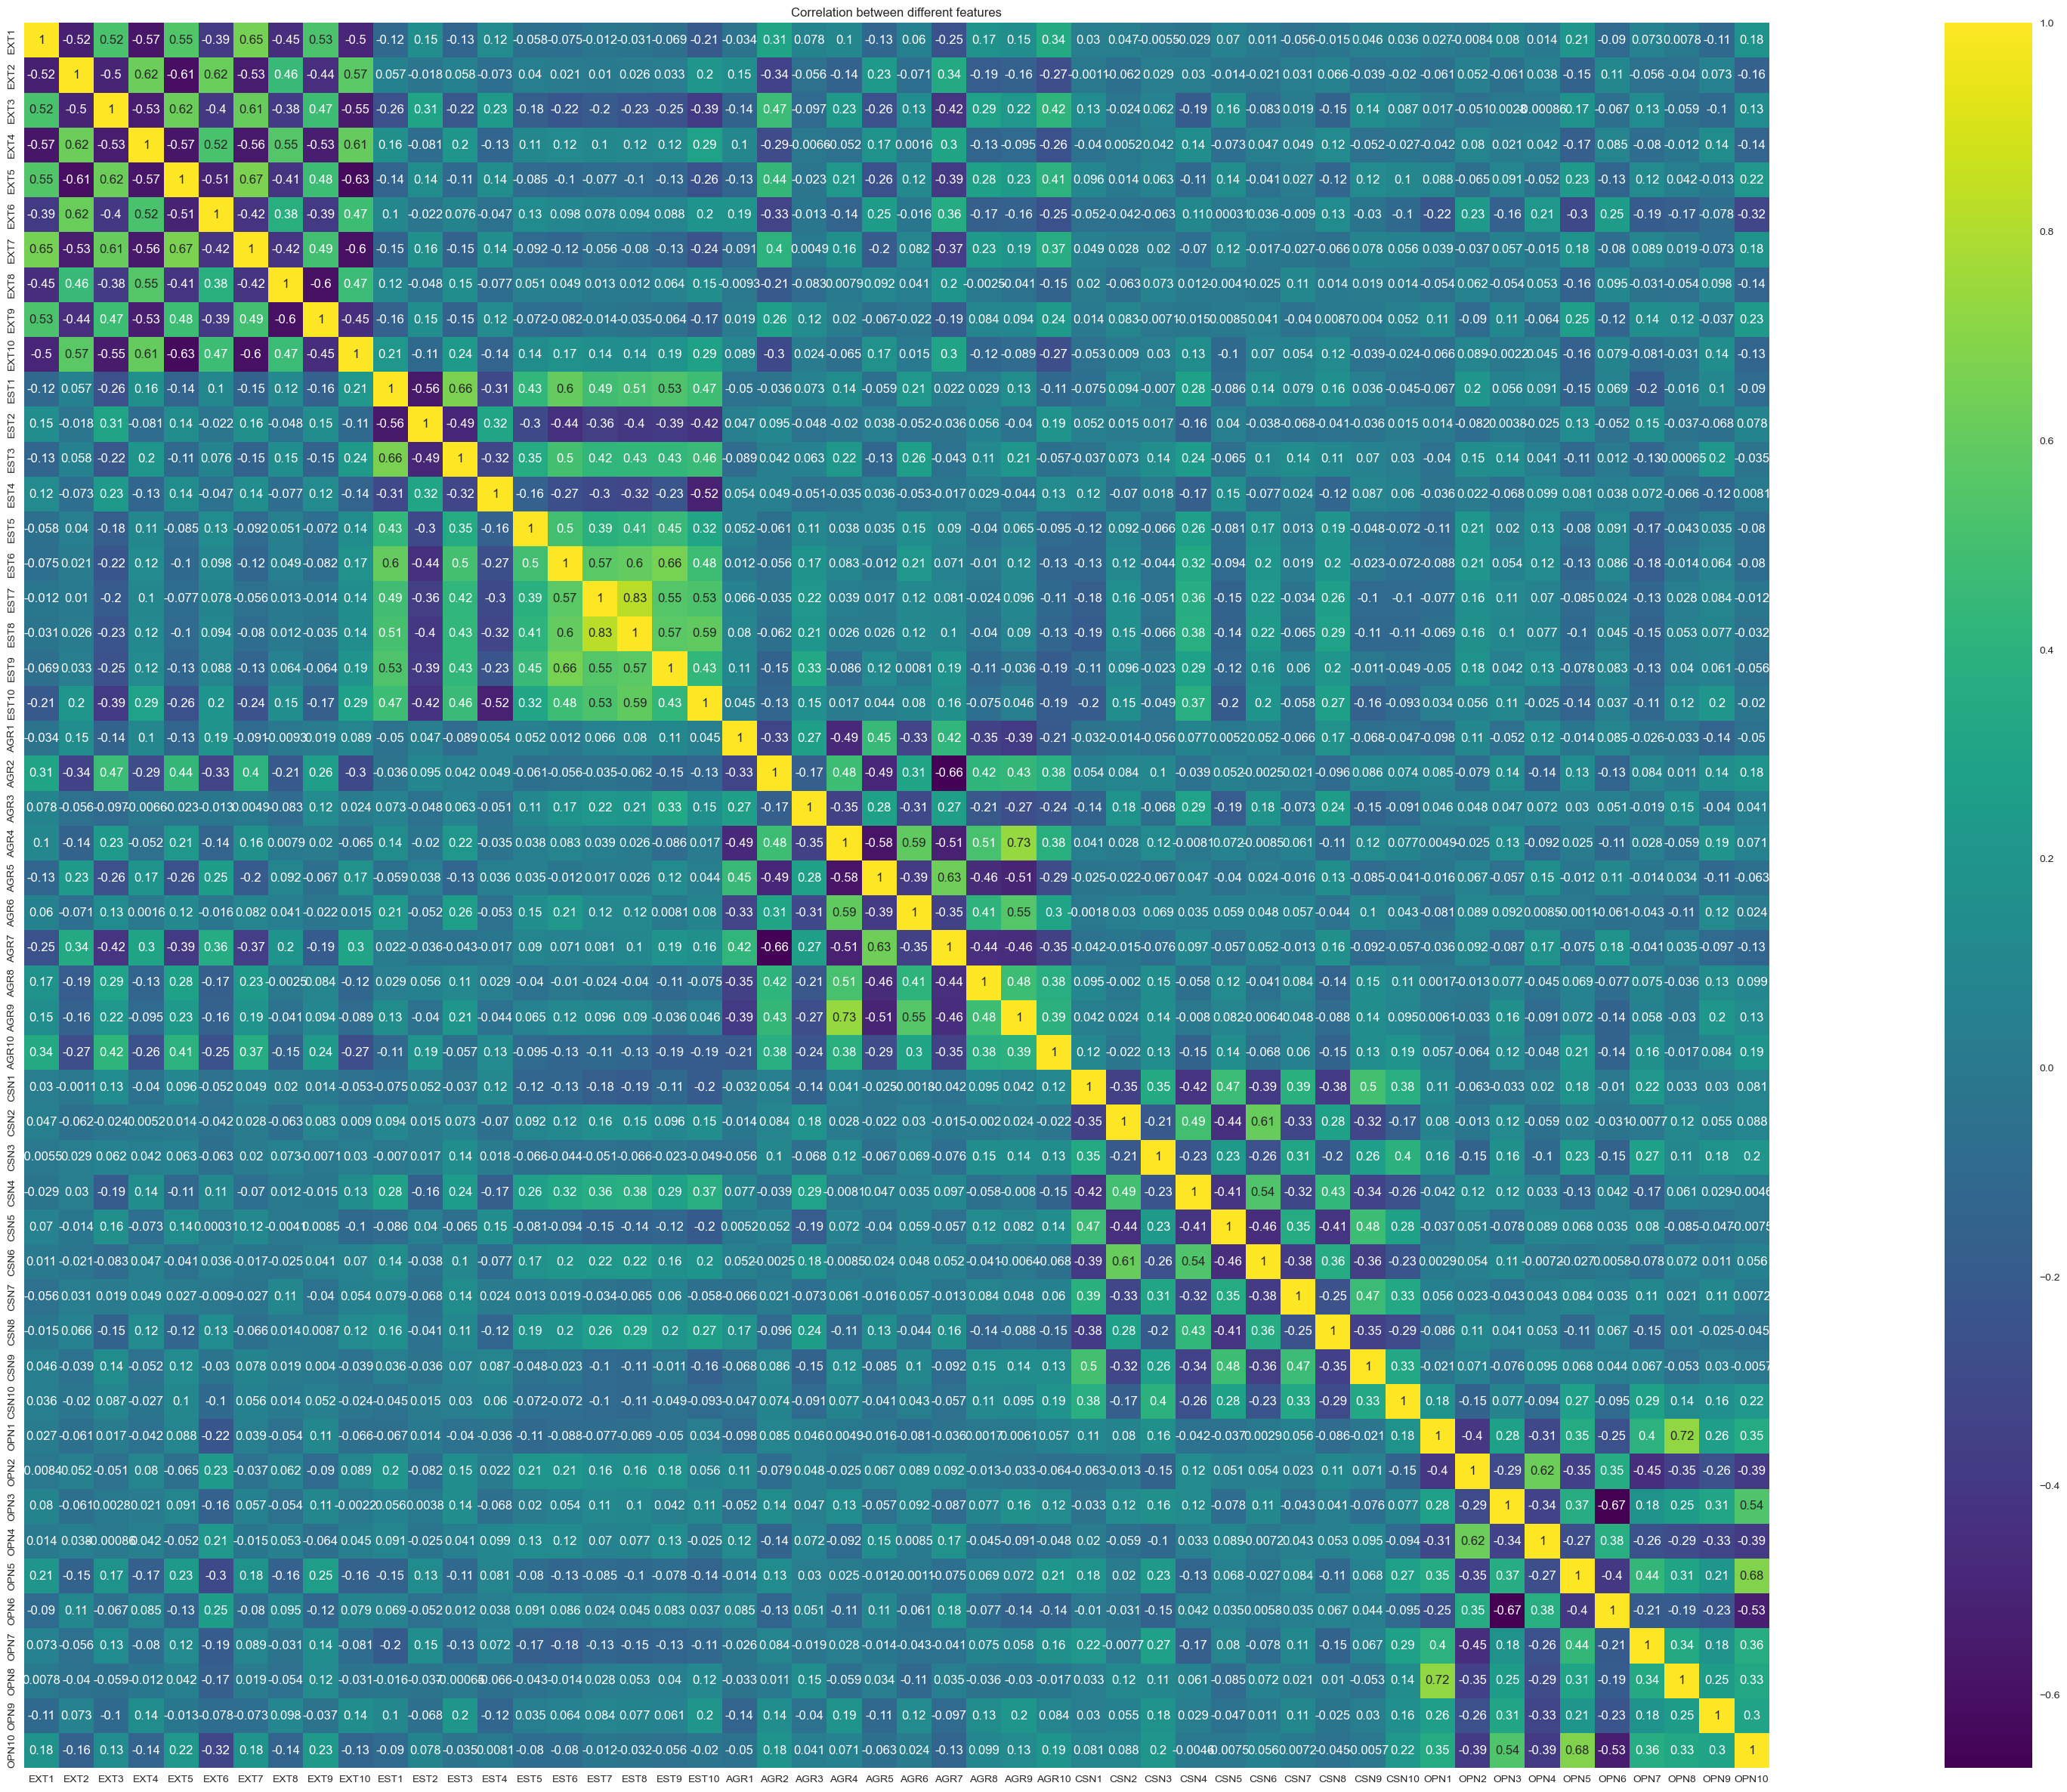

In [17]:
#correlation = mok.polychoric(df)
plt.figure(figsize=(60, 30))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')
plt.show()

## Clustering Using Factor Analysis Data

In [47]:
scaler1 = StandardScaler()
df_fa_fit = pd.DataFrame(scaler1.fit_transform(df_fa_fit))

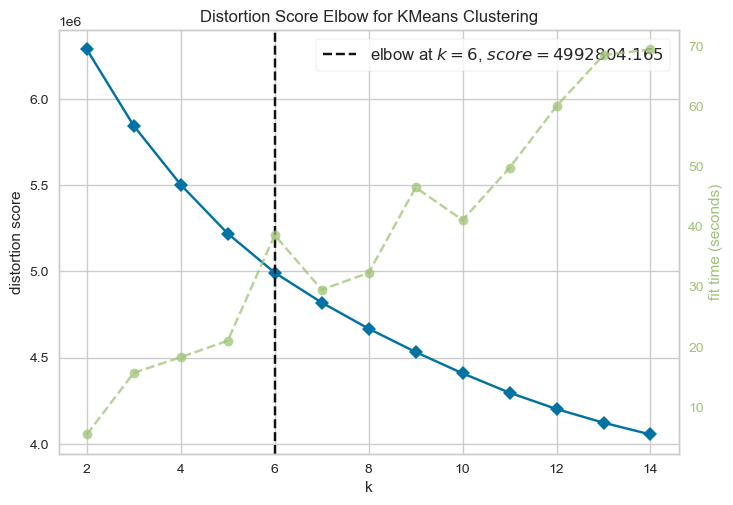

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans2 = KMeans()
visualizer1 = KElbowVisualizer(kmeans2, k=(2,15))
visualizer1.fit(df_fa_fit)
visualizer1.poof()

In [49]:
k_means_fa= KMeans(n_clusters = 6)

#define 5 clusters and fit the model
k_fit_fa = k_means_fa.fit(df_fa_fit)
centroids1 = k_fit_fa.cluster_centers_

In [50]:
pd.options.display.max_columns = 10
predictions1 = k_fit_fa.labels_
df_fa_fit['Clusters'] = predictions1
df_fa_fit.head()

0         1         2         3         4         5         6  \
0 -1.600523 -0.102819  1.249575  0.449350  0.126890  0.727365 -0.333758   
1  0.145198  0.711488 -1.463425 -0.809204 -1.488276 -0.181872  1.532257   
2 -0.180927  0.593412 -0.707180  0.052387 -1.149181  1.787122 -0.415004   
3  0.347504 -0.106640  0.643434  0.440928 -1.208983  0.758312 -0.040643   
4 -1.484993  0.927915 -1.843263  0.777448 -0.382323  0.109471  0.136423   

          7  Clusters  
0 -0.214888         3  
1  0.208404         0  
2  0.176267         4  
3 -0.698059         5  
4 -0.127249         0

### Analysing the Model and Predictions

In [51]:
df_fa_fit.Clusters.value_counts()

0    183095
4    153832
5    149452
3    147086
1    141127
2     99774
Name: Clusters, dtype: int64

In [52]:
pd.options.display.max_columns = 150
df_fa_fit.groupby('Clusters').mean()

0         1         2         3         4         5  \
Clusters                                                               
0        -0.948005  0.451140 -0.193675 -0.566279  0.185486  0.366680   
1         0.565903 -0.211156  0.073165 -0.732429  0.295597 -1.081113   
2         0.570196  1.052711  0.427803  1.174399  0.591975 -0.038889   
3        -0.368432 -0.999496  0.873300  0.160107  0.267137  0.260771   
4         0.695304 -0.400212 -0.902954  0.308966 -0.132811  0.602580   
5        -0.106716  0.339523 -0.047474  0.125763 -1.027779 -0.279252   

                 6         7  
Clusters                      
0         0.542220  0.153702  
1         0.295481  0.266241  
2         0.052349 -0.039409  
3        -0.455941  0.009537  
4         0.088954  0.325191  
5        -0.621085 -0.757510

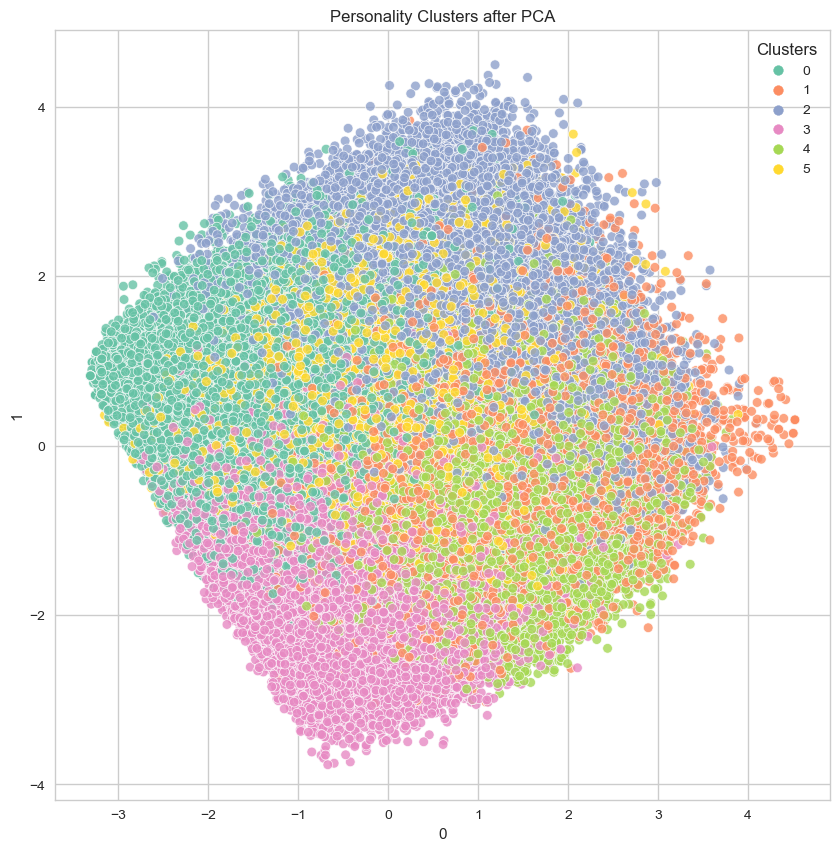

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_fa_fit, x=0 , y=1 , hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

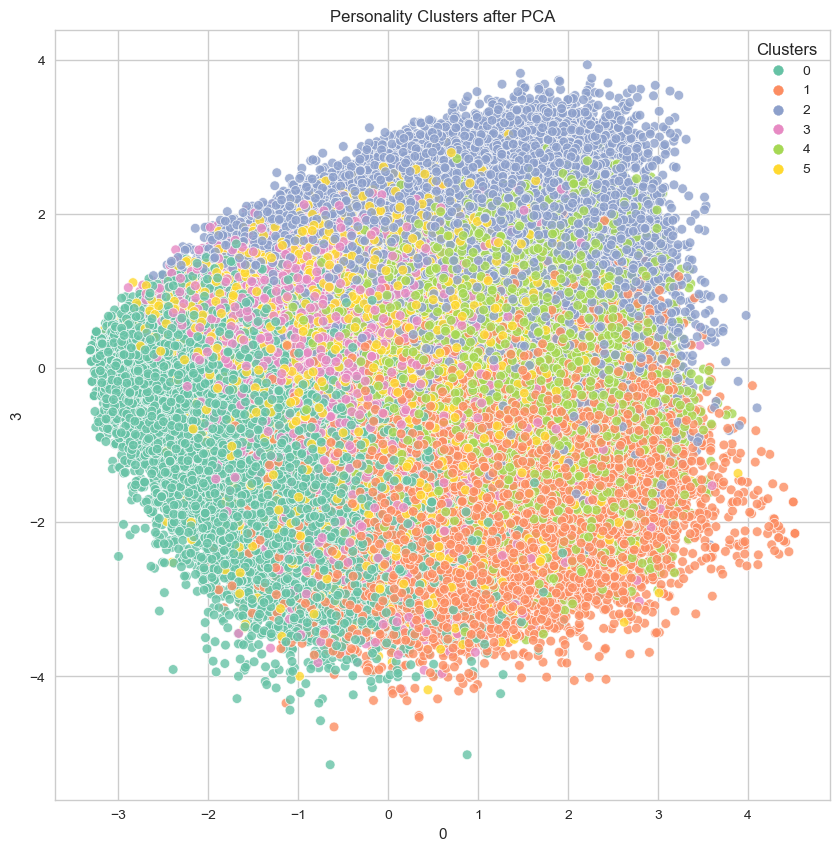

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_fa_fit, x=0 , y=3 , hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

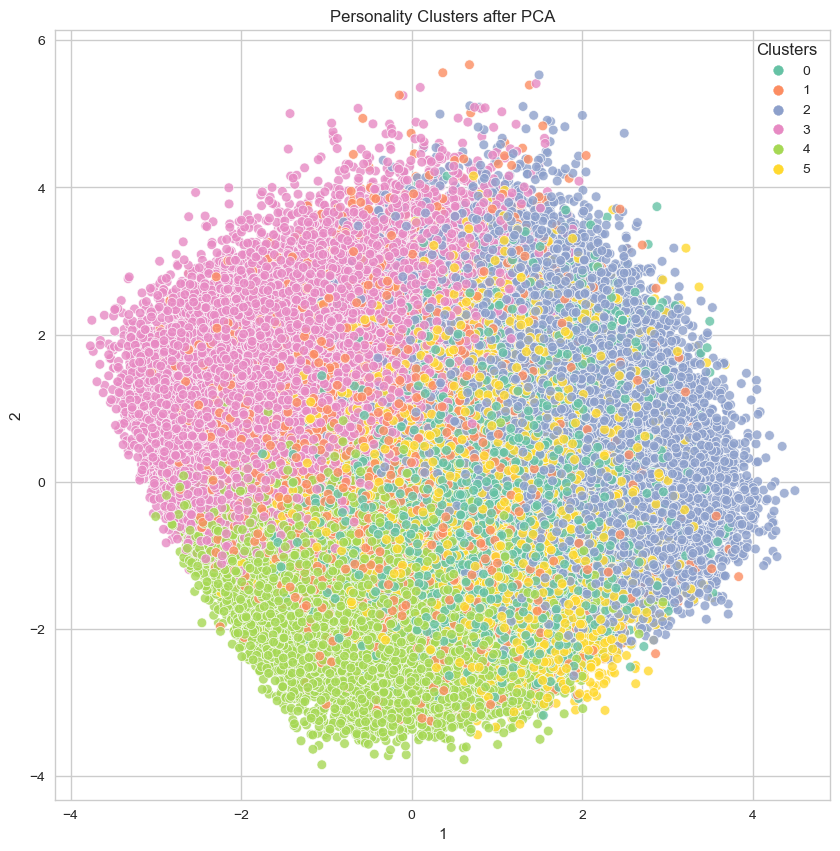

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_fa_fit, x=1 , y=2 , hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Predicting the Cluster for new data

In [73]:
new_row =[2,4,1,4,2,3,2,4,3,5,1,4,2,3,2,3,4,3,2,3,4,2,2,3,3,4,3,2,3,2,3,2,4,2,4,2,5,1,4,3,4,2,4,1,4,2,4,4,3,4]
my_data =pd.DataFrame(columns = list(data.columns))
my_data.loc[0] = new_row
my_data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0     2     4     1     4     2     3     2     4     3      5     1     4   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0     2     3     2     3     4     3     2      3     4     2     2     3   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0     3     4     3     2     3      2     3     2     4     2     4     2   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0     5     1     4      3     4     2     4     1     4     2     4     4   

   OPN9  OPN10  
0     3      4

In [76]:
import math
print('-----------Using PCA------------')
x=my_data_pca_fit[0]
dist=[]
for j in range(len(centroids)):
    dis=sum([(centroids[j][i]-x[i])**2 for i in range(len(x))])
    dist.append(math.sqrt(dis))
my_personality=dist.index(min(dist))
print('My Personality Cluster: ', my_personality)

print('-----------Using FA-------------')
x1=my_data_fa_fit[0]
dist1=[]
for j in range(len(centroids1)):
    dis=sum([(centroids1[j][i]-x1[i])**2 for i in range(len(x1))])
    dist1.append(math.sqrt(dis))
my_personality1=dist1.index(min(dist1))
print('My Personality Cluster: ', my_personality1)

-----------Using PCA------------
My Personality Cluster:  5
-----------Using FA-------------
My Personality Cluster:  2


In [77]:
def find_roommate(df_pca_fit, target_cluster, my_data_pca_fit):
    
    #selecting the data cooresponding to the desired cluster number
    df_cluster = df_pca_fit.groupby('Clusters').get_group(target_cluster)
    
    df_cluster = df_cluster.drop('Clusters', axis=1)
    df_cluster_array = np.array(df_cluster)
    
    # list to store data points of all clusters
    data_point_list = list(np.array(df_pca_fit.drop('Clusters', axis=1)))
    
    # list to store all data points of target clusters 
    point_list = []
    
    # list to store euclidean distance of the target point form all other data points belonging to the same cluster
    dist_list = []
    
    for i in range(df_cluster_array.shape[0]):
        point1 = my_data_pca_fit
        point2 = df_cluster_array[i]
        
        #storing data points belonging to the target cluster
        point_list.append(point2)
    
        # euclidean distance b/w target point and other points in the target cluster
        eucl_dist = np.linalg.norm(point1 - point2)
    
        dist_list.append(eucl_dist)
  
    min_idx = []                          # array to store indices of the 10 closest data points

    for d in sorted(dist_list)[:10]:          #selecting first 10 minimum distances

        temp_idx = dist_list.index(d)

        for k in range(len(data_point_list)):
            if list(point_list[temp_idx]) == list(data_point_list[k]):
                point_idx = k              # storing the index of closest points w.r.t to the original dataframe (df_pca_fit)

        min_idx.append(point_idx)          

    return min_idx

In [78]:
idx_list1 = find_roommate(df_pca_fit, my_personality, my_data_pca_fit)
idx_list2 = find_roommate(df_fa_fit, my_personality1, my_data_fa_fit)
print(idx_list1)
print(idx_list2)

[131368, 717218, 583417, 528462, 160812, 781178, 417273, 398271, 738666, 52665]
[759197, 293050, 150292, 836824, 145184, 500132, 841536, 741229, 768437, 517083]


In [79]:
df.iloc[idx_list1]

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
131368   2.0   4.0   2.0   4.0   2.0   2.0   2.0   4.0   4.0    4.0   2.0   
717218   2.0   5.0   3.0   5.0   2.0   1.0   3.0   4.0   2.0    3.0   1.0   
583417   2.0   3.0   2.0   4.0   3.0   3.0   2.0   2.0   2.0    4.0   2.0   
528462   3.0   3.0   3.0   3.0   3.0   3.0   3.0   4.0   3.0    4.0   3.0   
160812   4.0   2.0   4.0   2.0   3.0   2.0   4.0   3.0   3.0    3.0   1.0   
781178   2.0   4.0   1.0   4.0   1.0   4.0   2.0   4.0   1.0    5.0   4.0   
417273   3.0   3.0   3.0   3.0   2.0   3.0   3.0   3.0   4.0    4.0   3.0   
398271   4.0   2.0   4.0   2.0   3.0   1.0   3.0   3.0   5.0    4.0   1.0   
738666   3.0   2.0   4.0   2.0   4.0   2.0   4.0   2.0   4.0    4.0   1.0   
52665    3.0   3.0   3.0   3.0   2.0   3.0   2.0   5.0   2.0    4.0   4.0   

        EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
131368   4.0   2.0   4.0   2.0   2.0   2.0   2.0   2.0    2.0   4.0   2.0   
717218   4.0   2.0   4.0   2.0   2.0   2.0   2.0   2.0    2.0   4.0   2.0   
583417   4.0   3.0   3.0   2.0   2.0   3.0   2.0   2.0    2.0   4.0   3.0   
528462   3.0   3.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   3.0   
160812   3.0   3.0   3.0   2.0   2.0   3.0   3.0   2.0    2.0   4.0   4.0   
781178   4.0   2.0   2.0   2.0   2.0   2.0   3.0   2.0    2.0   4.0   2.0   
417273   3.0   3.0   3.0   3.0   3.0   3.0   4.0   3.0    3.0   5.0   4.0   
398271   4.0   1.0   5.0   2.0   2.0   3.0   2.0   1.0    1.0   4.0   4.0   
738666   4.0   3.0   3.0   2.0   2.0   2.0   2.0   2.0    1.0   4.0   4.0   
52665    4.0   2.0   3.0   2.0   2.0   4.0   3.0   2.0    2.0   4.0   2.0   

        AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  \
131368   2.0   3.0   4.0   4.0   2.0   2.0   4.0    3.0   3.0   2.0   4.0   
717218   2.0   3.0   3.0   4.0   3.0   3.0   2.0    3.0   5.0   2.0   4.0   
583417   1.0   4.0   2.0   3.0   4.0   2.0   4.0    3.0   3.0   3.0   4.0   
528462   2.0   4.0   3.0   4.0   3.0   3.0   3.0    3.0   2.0   3.0   3.0   
160812   2.0   4.0   2.0   4.0   4.0   4.0   4.0    4.0   3.0   1.0   4.0   
781178   1.0   4.0   3.0   4.0   2.0   3.0   1.0    2.0   2.0   2.0   4.0   
417273   2.0   3.0   3.0   4.0   2.0   3.0   4.0    3.0   2.0   2.0   3.0   
398271   2.0   4.0   2.0   4.0   2.0   2.0   3.0    3.0   4.0   3.0   5.0   
738666   2.0   4.0   2.0   4.0   2.0   4.0   4.0    4.0   4.0   2.0   4.0   
52665    2.0   4.0   2.0   4.0   2.0   3.0   4.0    3.0   2.0   3.0   3.0   

        CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  \
131368   2.0   3.0   2.0   4.0   2.0   4.0    4.0   4.0   2.0   4.0   2.0   
717218   1.0   4.0   2.0   5.0   1.0   4.0    4.0   4.0   1.0   4.0   1.0   
583417   3.0   4.0   2.0   4.0   2.0   3.0    3.0   4.0   2.0   4.0   2.0   
528462   3.0   3.0   3.0   4.0   3.0   3.0    3.0   2.0   2.0   3.0   2.0   
160812   2.0   3.0   2.0   4.0   2.0   4.0    3.0   3.0   2.0   4.0   1.0   
781178   2.0   4.0   3.0   4.0   2.0   2.0    3.0   4.0   2.0   4.0   1.0   
417273   3.0   3.0   3.0   3.0   2.0   3.0    3.0   3.0   3.0   4.0   2.0   
398271   1.0   4.0   1.0   5.0   2.0   4.0    4.0   5.0   1.0   5.0   1.0   
738666   2.0   4.0   2.0   4.0   2.0   4.0    4.0   4.0   2.0   4.0   1.0   
52665    3.0   3.0   4.0   4.0   3.0   3.0    3.0   2.0   3.0   4.0   2.0   

        OPN5  OPN6  OPN7  OPN8  OPN9  OPN10 country  
131368   4.0   4.0   4.0   3.0   4.0    4.0      SG  
717218   4.0   1.0   4.0   2.0   4.0    5.0      RO  
583417   3.0   2.0   4.0   4.0   4.0    4.0      US  
528462   3.0   3.0   3.0   2.0   3.0    3.0      US  
160812   4.0   2.0   4.0   3.0   3.0    4.0      US  
781178   3.0   2.0   4.0   4.0   4.0    5.0      US  
417273   3.0   2.0   3.0   4.0   3.0    4.0      PH  
398271   5.0   1.0   4.0   3.0   5.0    5.0    NONE  
738666   4.0   2.0   4.0   4.0   4.0    5.0      ET  
52665    3.0   2.0   3.0   2.0   3.0    3.0      PK

In [80]:
my_data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0     2     4     1     4     2     3     2     4     3      5     1     4   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0     2     3     2     3     4     3     2      3     4     2     2     3   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0     3     4     3     2     3      2     3     2     4     2     4     2   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0     5     1     4      3     4     2     4     1     4     2     4     4   

   OPN9  OPN10  
0     3      4

In [81]:
df.iloc[idx_list2]

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
759197   3.0   5.0   3.0   4.0   2.0   5.0   2.0   4.0   2.0    4.0   4.0   
293050   3.0   4.0   2.0   3.0   1.0   4.0   1.0   4.0   2.0    5.0   2.0   
150292   2.0   5.0   3.0   4.0   2.0   4.0   1.0   3.0   4.0    5.0   3.0   
836824   2.0   4.0   2.0   4.0   2.0   2.0   2.0   4.0   2.0    4.0   2.0   
145184   1.0   4.0   3.0   4.0   4.0   4.0   2.0   4.0   4.0    4.0   2.0   
500132   2.0   3.0   2.0   4.0   2.0   2.0   2.0   4.0   2.0    4.0   2.0   
841536   3.0   5.0   2.0   5.0   2.0   4.0   1.0   5.0   4.0    5.0   2.0   
741229   2.0   4.0   2.0   4.0   2.0   4.0   3.0   4.0   2.0    4.0   3.0   
768437   3.0   5.0   3.0   4.0   3.0   4.0   3.0   4.0   3.0    5.0   2.0   
517083   2.0   3.0   3.0   3.0   2.0   3.0   2.0   3.0   3.0    4.0   2.0   

        EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
759197   4.0   3.0   3.0   1.0   1.0   3.0   1.0   4.0    3.0   3.0   2.0   
293050   4.0   3.0   2.0   4.0   2.0   2.0   2.0   2.0    4.0   4.0   1.0   
150292   4.0   3.0   1.0   2.0   2.0   2.0   2.0   2.0    2.0   3.0   3.0   
836824   4.0   2.0   2.0   2.0   2.0   2.0   2.0   4.0    4.0   2.0   2.0   
145184   4.0   2.0   2.0   2.0   2.0   2.0   2.0   4.0    4.0   4.0   3.0   
500132   4.0   4.0   3.0   2.0   2.0   4.0   4.0   1.0    3.0   4.0   3.0   
841536   2.0   4.0   4.0   3.0   2.0   2.0   2.0   2.0    4.0   3.0   3.0   
741229   3.0   4.0   2.0   2.0   2.0   3.0   2.0   2.0    4.0   4.0   3.0   
768437   2.0   4.0   2.0   2.0   2.0   2.0   2.0   2.0    4.0   4.0   3.0   
517083   4.0   2.0   3.0   3.0   3.0   3.0   2.0   3.0    2.0   3.0   2.0   

        AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  \
759197   3.0   2.0   3.0   3.0   3.0   4.0   2.0    3.0   4.0   1.0   5.0   
293050   2.0   4.0   2.0   3.0   4.0   2.0   4.0    3.0   4.0   2.0   4.0   
150292   2.0   3.0   4.0   4.0   3.0   3.0   2.0    3.0   4.0   2.0   4.0   
836824   2.0   2.0   4.0   4.0   4.0   4.0   2.0    4.0   4.0   1.0   4.0   
145184   3.0   3.0   3.0   2.0   4.0   4.0   2.0    3.0   4.0   2.0   4.0   
500132   3.0   3.0   4.0   2.0   2.0   4.0   2.0    3.0   4.0   2.0   4.0   
841536   1.0   3.0   4.0   3.0   4.0   2.0   3.0    3.0   3.0   1.0   5.0   
741229   3.0   3.0   4.0   2.0   3.0   3.0   3.0    3.0   3.0   2.0   3.0   
768437   3.0   2.0   4.0   4.0   4.0   2.0   2.0    4.0   4.0   1.0   4.0   
517083   3.0   3.0   4.0   4.0   4.0   3.0   2.0    3.0   3.0   1.0   3.0   

        CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  \
759197   1.0   2.0   1.0   4.0   3.0   5.0    3.0   4.0   1.0   5.0   1.0   
293050   2.0   4.0   2.0   3.0   3.0   5.0    3.0   4.0   2.0   4.0   2.0   
150292   1.0   4.0   2.0   3.0   3.0   3.0    5.0   4.0   1.0   4.0   1.0   
836824   2.0   4.0   2.0   4.0   2.0   4.0    4.0   3.0   1.0   4.0   1.0   
145184   2.0   4.0   2.0   4.0   1.0   3.0    3.0   3.0   2.0   4.0   2.0   
500132   2.0   3.0   2.0   4.0   4.0   3.0    4.0   3.0   2.0   4.0   2.0   
841536   2.0   3.0   1.0   3.0   1.0   3.0    3.0   4.0   3.0   3.0   1.0   
741229   2.0   4.0   2.0   4.0   2.0   3.0    4.0   4.0   3.0   5.0   2.0   
768437   2.0   4.0   2.0   4.0   2.0   4.0    3.0   4.0   1.0   4.0   2.0   
517083   1.0   4.0   2.0   5.0   2.0   2.0    4.0   4.0   1.0   4.0   1.0   

        OPN5  OPN6  OPN7  OPN8  OPN9  OPN10 country  
759197   3.0   2.0   4.0   4.0   4.0    4.0      US  
293050   4.0   2.0   4.0   4.0   4.0    4.0      US  
150292   4.0   2.0   4.0   3.0   5.0    4.0      IN  
836824   4.0   2.0   4.0   2.0   5.0    4.0      CA  
145184   3.0   2.0   5.0   2.0   5.0    4.0      SG  
500132   3.0   1.0   5.0   3.0   4.0    3.0      PL  
841536   4.0   2.0   4.0   4.0   5.0    3.0      KR  
741229   4.0   1.0   4.0   4.0   5.0    4.0      AU  
768437   4.0   2.0   5.0   3.0   3.0    4.0      MX  
517083   4.0   2.0   5.0   3.0   4.0    4.0      HU